# Empalme con la clase anteior

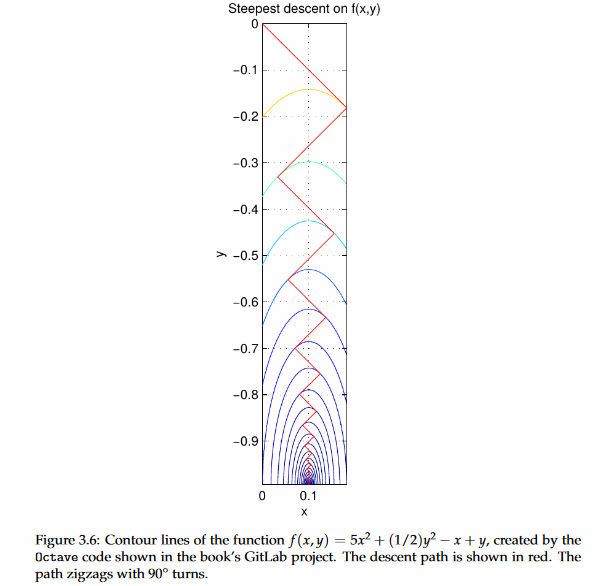

## Linea de busqueda en Steepest Descent (SD).
Recuerde las ecuaciones normales

$$X^T X \theta = X^T y $$
Llamemos $A=X^T X$, b=X^T y$
de forma que encontramos que

$$\nabla J(\theta) = A \theta - b. \tag{3} $$
Vimos un ejercicio donde si $z=\frac12 \theta^T A \theta - b^T \theta + c$ entonces
$\nabla z = A \theta - b $.

Pregunta (Juan Jose). Que valor debe tener $\alpha$? Si estamos resolviendo el metodo de minimos cuadrados (regresion lineal) si se puede hallar el $\alpha$ optimo. En la practica esto es imposible.

Podemos definir una funcion auxiliar

$$\varphi(\alpha) = J[ \theta_0 - \alpha \nabla J(\theta_0)] $$
La idea para encontrar el $\alpha$ optimo es derivar e igualar a 0 y resolver la ecuacion. Usando la regla de la cadena.

$$\varphi'(\alpha) = \nabla J[ \theta_0 - \alpha \nabla J(\theta_0)] \cdot \nabla J(\theta_0) = 0 $$

Definamos

$$\theta_1 = \theta_0 - \alpha \nabla J(\theta_0) \tag{4} $$
Recuerde la ecuacion (3) y de la ecuacion (4)

$$A \theta_1 - b = A \theta_0 - b - \alpha A \nabla J(\theta_0) \tag{5} $$
Definamos ahora los residuales

$$r_0 = A \theta_0 -b = \nabla J(\theta_0) $$
$$r_1 = A \theta_1 -b = \nabla J(\theta_1) $$
podemos reescribir la ecuacion (5) como

$$r_1= A \theta_1 - b = A (\theta_0 - \alpha \nabla J(\theta_0)) - b = A \theta_0 -b - A \alpha \nabla J(\theta_0) = r_0 - \alpha A \nabla J(\theta_0) $$

Reescribiendo

$$r_1= r_0 - \alpha A \nabla J(\theta_0) $$

Recuerde que $r_0 \cdot r_1 = 0$.
Entonces premultiplicamos por $r_0^T$ a ambos lados de esta ecuacion. Para despejar $\alpha$

$$r_0^T r_1= r_0^T r_0  - \alpha A r_0^T \nabla J(\theta_0) $$
$$0 = \| r_0 \|^2  - \alpha A r_0^T \nabla J(\theta_0) $$

$$0 = \| r_0 \|^2  - \alpha  r_0^T A  r_0 $$

Despejamos $\alpha$

$$\alpha = \frac{\| r_0 \|^2}{ r_0^T A r_0} $$

Este es el $\alpha$ optimo analitico.

En la proxima clase mostramos el algoritmo de SD y ejemplos numericos.



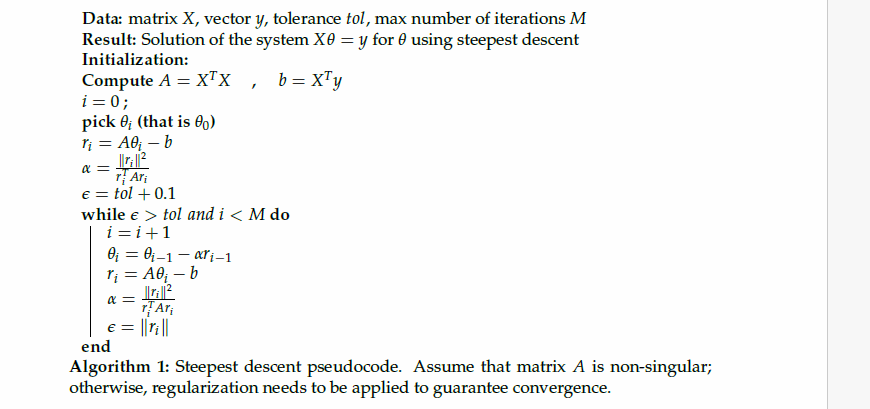

**Ejemplo 3.1.1**: Asuma la matriz $A$ y el vector $b$ dados por

$$A = X^T X = \begin{pmatrix} 10 & 0 \\ 0 & 1\end{pmatrix} \quad , \quad b=\binom{1}{-1} $$
Comenzamos iteraciones en $\theta^{(0)}=(0,0)^T$.

La forma cuadratica correspondiente a estos datos es

$$J(\theta) = \frac12 \theta^T A \theta  - b^T \theta = \frac12 \theta^T X^T X \theta - y^T X \theta = 5 \theta_0^2 + \frac12 \theta_1^2 - \theta_0 + \theta_1 $$

Se implemento el Algoritmo 1, empezando en $\theta^{(0)}  = (0,0)$.
La solucion luego de 25 iteraciones es
$$\theta^{(25)} = (0.100663, -0.993374) $$
La funcion de costo en este punto es

$$J(0.100663, -0.993374) =-0.549976 $$

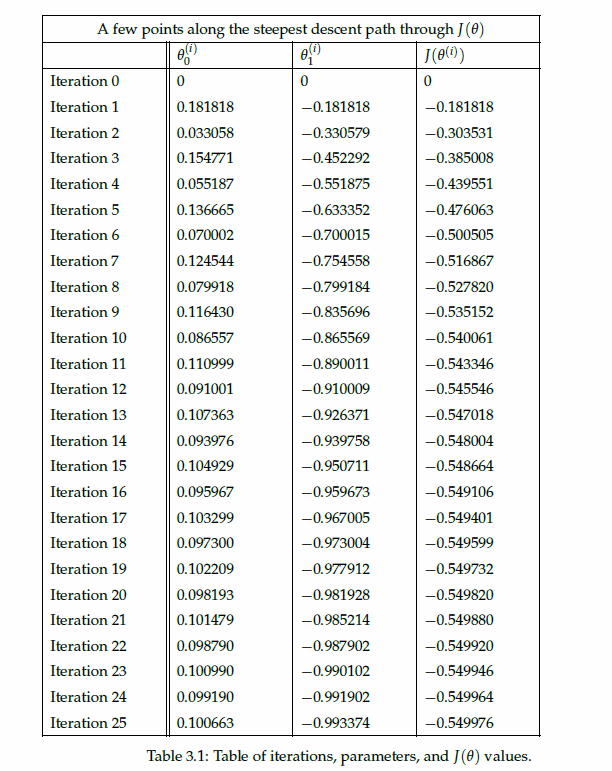

La Tabla 3.1 muestra los valores de $\theta^{(i)}$ junto con la funcion de perdida. Esta corresponde a la Figura 3.6.

Vamos a hacer ilustracion del metodo de gradiente con descenso (no SD) con un $\alpha$ fijo. Por simplicidad.
Escojo la funcion $f(x)=x^4$ por simplicidad. No dibujamos contornos o curvas de nivel por que serian puntos.

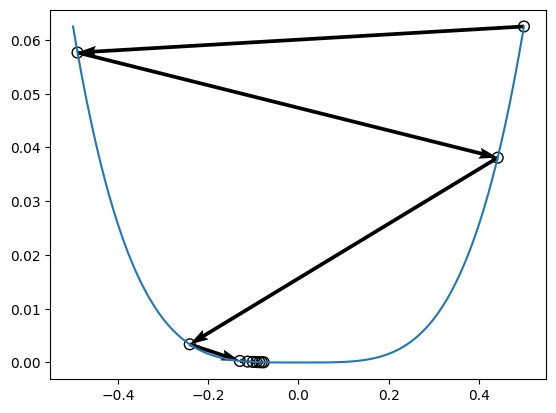

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# funcion sencilla f(x)=x^4
def f(x):
    return x**4

# calculemos el gradiente
def grad(x):
    return 4*x**3

# definamos alpha fijo
alpha = 1.98 # juegue con alpha
# alpha=0.5

# punto de arranque
x=0.5 # ojo lo que llamo x es theta
# x=0.

# lista de puntos
xlist=[x]
ylist=[f(x)]

# maximo numero de iteraciones
M=10

# el metodo de descenso
for i in range(M):
    x = x - alpha*grad(x)
    y = f(x)
    xlist.append(x)
    ylist.append(y)

# graficamos
xdomain = np.arange(-0.5, 0.51, 0.01)
plt.title = ("descenso usando gradiente")

# convertimos listas en arreglos
xarr = np.array(xlist)
yarr = np.array(ylist)

# graficamos la curva
plt.plot(xdomain, f(xdomain))

# flechas
plt.quiver( xarr[:-1], yarr[:-1], xarr[1:]-xarr[:-1], yarr[1:]-yarr[:-1],
           scale_units='xy', angles='xy', scale=1)

plt.scatter( xlist, ylist, s=60, facecolors='none', edgecolors='k')
plt.show()


Una grafica donde se hace SD en la superficie del ejemplo 3.1.1

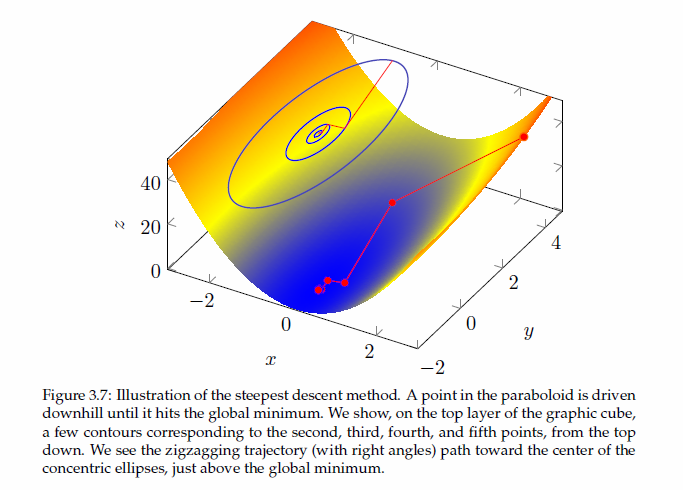

## Conjugate Gradient. Gradiente conjugado.
La idea del CG originaria de 3 personas trabajando simultaneamente en distintas partes del mundo. Hestens Stiefel (1952) y de otro lado Cornelius Lanzcos.

Lo pensaron estos individuos es, por que no buscar una trayectoria que mientras estemos en un plano, el punto se diriga al **centro** de la elipse que corta este plano.

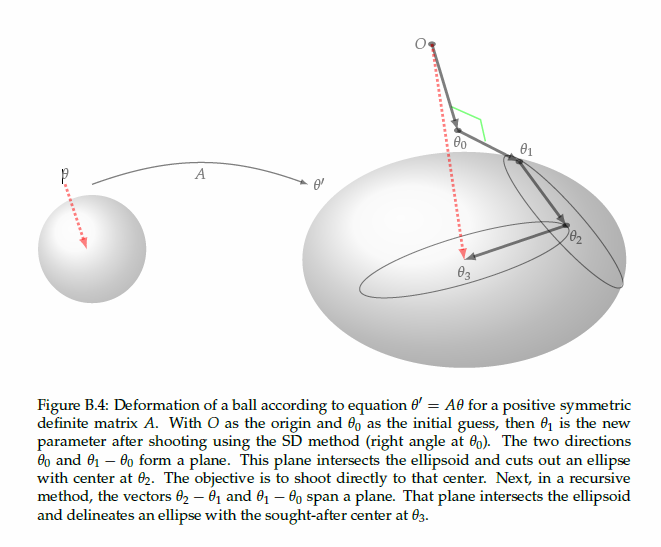

La idea es pensar que se  en cada elpse se dirige directamente hacia el centro de la misma (esa direccion se llama **conjugada**). Veamos un ejemplo grafico.

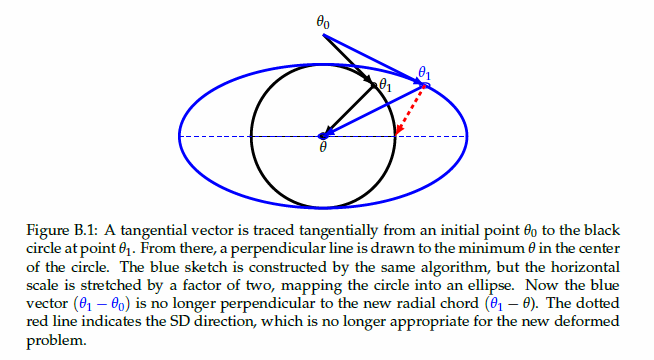

Nosotros definimos ortogonalidad de dos vectores $u,v$ como la propiedad tal que
$\langle u, v \rangle = 0$
Existe la **ortogonalidad via $A$**. Donde $A$ es positiva definida.
La definicion es vectores $u,v$ tales que

$$\langle Au, v \rangle = \langle u, A v \rangle = u^T A v = 0 $$
Esto es $A-orthogonality$.
El angulo entre $u,v$ determina la **direccion conjugada** (ver grafica anterior)

El algoritmo de CG (Conjugate Gradient) requiere dos escalares $\alpha, \beta$ y esta explicado en el apendice.  Tiene la limitacion que es para problemas lineales (funciones de costo cuadraticas). Se puede extender a problemas no lineles. Ejemplo L-BFGS (creo que en el proyecto para hoy es el que se utiliza).



En general hay algorimos de busqueda donde $\alpha$ se puede "sintonizar" (tunning)


 * En SD y CG, $\alpha$ es analitico. (en CG exste $\beta$?)
 * En general para funciones no lineales, no existe un algoritmo analitico.
    * Se pueden encontrar tres puntos para tres valores $\alpha_1, \alpha_2, \alpha_3$. Luego se calcula la parabola de $J(\theta-\alpha_i \nabla J)$
    con $i=1,2,3$. Genera una parabola. Se halla el minimo de la parabola, este minimo ocurre en $\alpha_{min}$, este es el valor a usar.
* Backtracing line searh: Comienza con un $\alpha$ "grande" y comienza a bajar (dividiendo por 10). Por ejemplo $\alpha=2, 0.2, 0.02$. Hay un articulo de esto que se Larry Armijo. Matlab tiene la funcion `so_step_armijo` que usas esta tecnica.

* Trial an error: Prueba y error. Comienza con $\alpha>0$ pequenho y lo incrementa por potentias de 10. Por ejemplo $\alpha=0.00001, 0.0001, 0.001, 0.01$.
Sin embargo en DL (Deep Learning) existen tecnicas que se llaman "gradient accelerators" que estudian este problema. Lo ensenho en DL. Estas son

* Momentum (Polyac, Ruso)
* Nesterov (Estudiante de Polyac, Ruso)
* AdaGrad (Adaptive Gradient)
* Adam (Adaptive Momentum)
* RMSprop (Geoffrey Hinton y su equipo)
* AdaDelta (?)
La que mas se usa es la Adam.

De acuerdo a la forma de accesar los datos existen tres tecnicas de descenso con el gradinte.

1.  Batch Gradient Descent (todo lo que hemos visto hasta el momento)
2.  Stochastic Gradient Descent (lo que veremos en la proxima hora)
3. Minibatch Gradient Descent (la mas comun y la discutimos al final de la clase).

En Batch Gradient descent usamos **todos los datos** de una.

El algoritmo clasico y simple es.

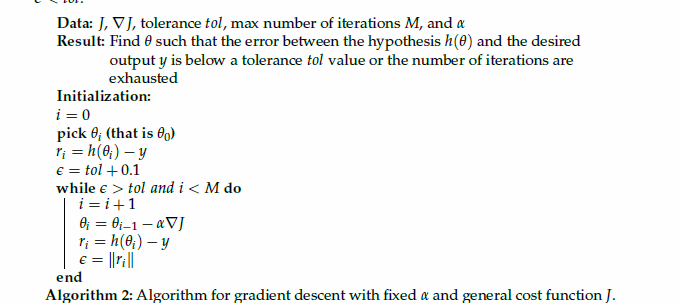

Hay un paso muy importante en este algoritmo

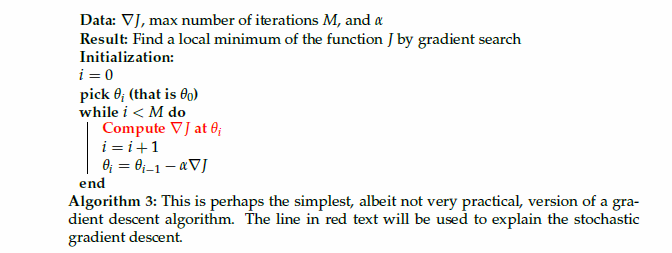

La siguiente grafica muestra como desciende el camino usando gradiente. La
funcion es $f(\theta_0, \theta_1)= \sin \theta_0 \sin \theta_1$, $\theta_0, \theta_1 \in [0, 2 \pi]$

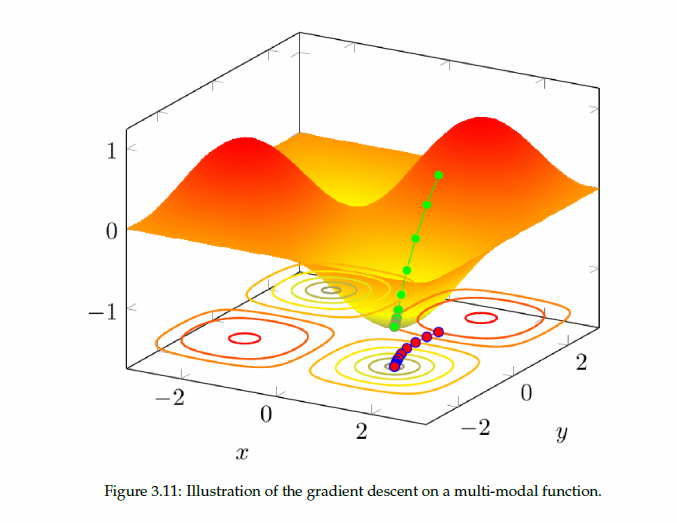

## Stochastic Gradient Descent (SGD).
La idea aca es minimizar el esfuerzo en el computo de la linea roja del algoritmo (Algoritmo 3).

Veamos en que consiste el SGD. Primero estudiamos dos ejemplos donde el gradiente se puede factorizar sobre los datos (muestras).

* Minimos cuadrados: Se trata de ajustar $Ax$ a $b$, o minimizar $Ax-b$ donde la funcion de costo

$$J(x, A, y) = \frac12 \| A x - y \|^2 = \frac12 \sum_{i=1}^m
\left (  \sum_{j=1}^n a_{ij} x_j - y_i  \right )^2 $$

Veamos como podemos escribir esto como una suma sobre las muestras.

Definamos una funcion de costo auxiliar

$$C_i(x,A, y) = \frac{m}{2} \left ( \sum_{j=1}^n (a_{ij} x_j - y_i \right )^2  $$

De forma

$$J(x, A, y) = \frac1m \sum_{i=1}^m C_i(x,A,y) $$

* Regresion logistica: En la proxima clase veremos regresion logistica y estudiaremos su funcion de costo.


$$J(\theta, x, y) = -\frac1m \sum_{i=1}^m y_i \log[h(\theta, x^{(i)})] + (1 - y_i) \log [ 1 - h(\theta, x^{(i)}] $$
donde $x^{(i)}$ es la muestra $i$ y $h(\theta, x^{(i)})$ es la hipotesis, $\theta$ el parametro (en la proxima clase explico esto)

De la misma forma que hicimos arriba podemos escribir

$$C_i(x, \theta, y) =  -\log[h(\theta, x^{(i)})] + (1 - y_i) \log [ 1 - h(\theta, x^{(i)}] $$
Visto de esta forma

$$J(\theta, x, y) =\frac1m \sum_{i=1}^m C_i(x, \theta, y) $$


Por que funciona el SGD?
Una imagen:

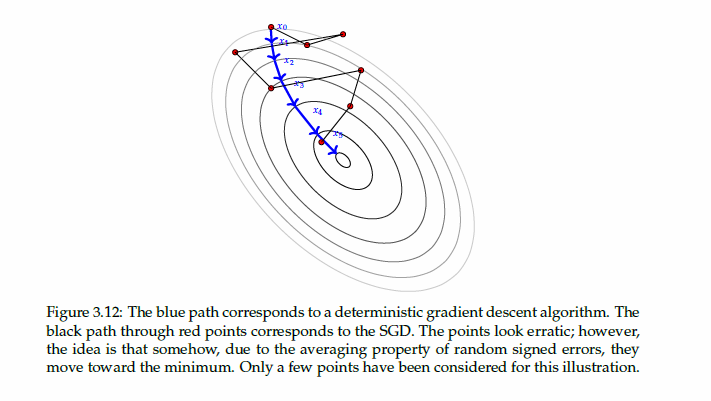

El algoritmo se muestra a continuacion.

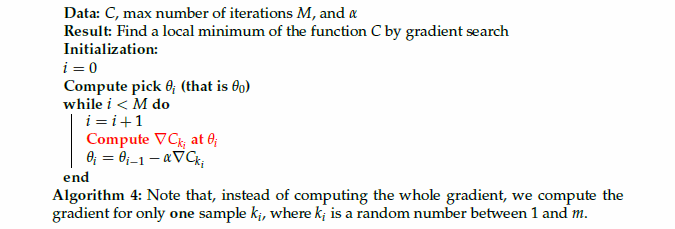

Haremos un ejemplo (juguete) para mostrar por que el SDG tiene sentido.

Asuma que estamos en 2D. Que tenemos cinco puntos
$$
(x_1, y_1) \; , \;
(x_2, y_2) \; , \;
(x_3, y_3) \; , \;
(x_4, y_4) \; , \;
(x_5, y_5)
$$
los cuales los quiero **ajustar** a una recta que pasa por el origen.
Usando regresion lineal, queremos hallar los $\theta_i$ $i=1,2,3,4,5$ optimos tales que

$$y_1 = \theta x_1  $$
$$y_2 = \theta x_2  $$
$$y_3 = \theta x_3  $$
$$y_4 = \theta x_4  $$
$$y_5 = \theta x_5  $$

Queremos usar minimos cuadrados

$$J(\theta) = \frac15 \sum_{i=1}^5 (\theta x_i - y_i)^2 $$
Las funciones de costo locales son

$$C_i(\theta) = ( \theta x_i - y_i)^2 $$
$$J(\theta) = \frac15 \sum_{i=1}^5 C_i(\theta) $$

El gradiente de $J$ es

$$\nabla J(\theta) = \frac{d J}{d \theta} = \frac25 \sum_{i=1}^5 (\theta x_i - -y_i) x_i  $$

El gradiente de cada funcion de costo local es

$$\nabla C_i(\theta) = \frac{d C_i}{d \theta} = 2 x_i(\theta x_i - y_i) $$

Claramente

$$\nabla J(\theta) = \frac15 \sum_{i=1}^5 \nabla C_i(\theta) $$

Cada funcion de costo local es una parabola $(\theta x_i - y_i)^2 = x_i^2 \theta^2 - 2 \theta x_i y_i + y_i^2$.

Por ejemplo, consideremos los siguientes 5 puntos.
$$(-1, -0.5), (1,1), (3,2), (4,3), (5,6) $$

Las funciones de costo locales para cada uno de estos 5 puntos son

\begin{eqnarray}
C_1(\theta) &=& (-\theta + 0.5)^2 \quad, \quad \text{minimo en  } \theta=0.5 \\
C_2(\theta) &=& (\theta -1)^2 \quad, \quad \text{minimo en  } \theta=1 \\
C_3(\theta) &=& (3 \theta -2) ^2 \quad, \quad \text{minimo en  } \theta=2/3\approx 0.666.. \\
C_4(\theta) &=& (4 \theta -3) ^2 \quad, \quad \text{minimo en  } \theta=3/4\approx 0.75 \\
C_5(\theta) &=& (5 \theta -6) ^2 \quad, \quad \text{minimo en  } \theta=6/5\approx 1.2 \\
\end{eqnarray}

La Figura siguiente muestra las funciones de costo locales y la global.

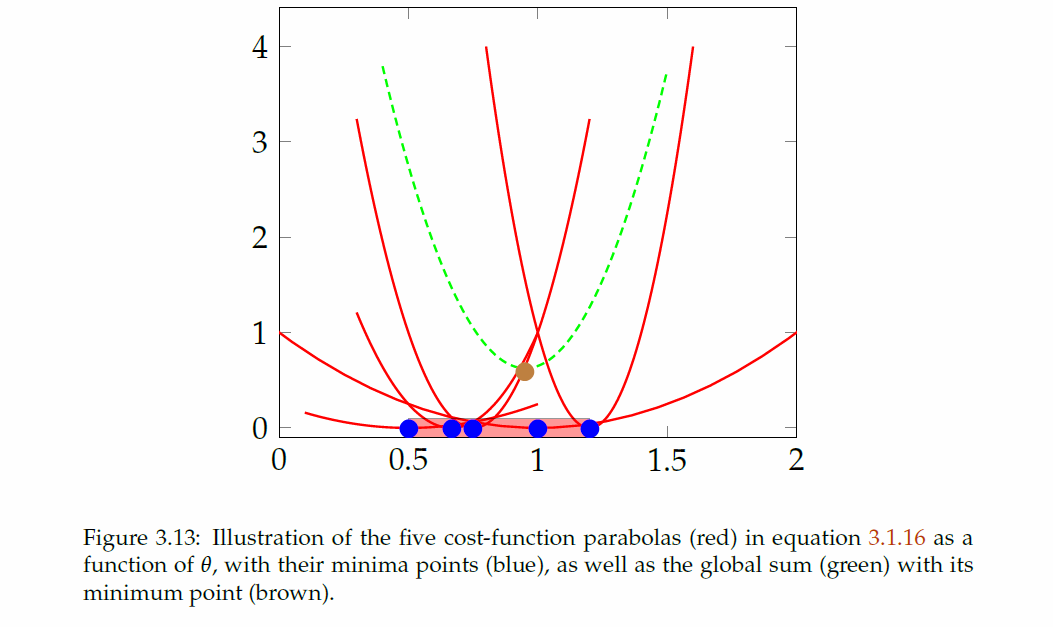

Escribamos la funcion de costo global y los gradientes locales.

$$ J(\theta) = \frac15 [ ( - \theta + 0.5)^2 + (\theta-1)^2 + (3 \theta -2)^2 + (4 \theta -3)^2 + (5 \theta - 6)^2 $$

\begin{eqnarray}
\nabla C_1(\theta) &=& -2 ( -\theta + 0.5) \\
\nabla C_2(\theta) &=& 2 ( \theta -1) \\
\nabla C_3(\theta) &=& 6 ( 3 \theta -2) \\
\nabla C_4(\theta) &=& 8 ( 4 \theta -3) \\
\nabla C_5(\theta) &=& 10 ( 5 \theta -6) \\
\end{eqnarray}

Por ultimo

$$\nabla J(\theta) = \frac15 [ -2 ( -\theta + 0.5) + 2 ( \theta -1) + 6(3 \theta -2) + 8(4 \theta -3) + 10(5 \theta -6). $$

**Definicion** (Region de confusion). La region de confusion es el intervalo entre el minimo de todos los minimos $m$ y el maximo de todos los minimos $M$.
Es decir $[m, M]$. La franja roja en la Figura 3.13, o  mas especificamente
$[0.5, 1.2]$.

Este ejemplo es claramente analitico y simple. Veamos un ejemplo en 2D.
La grafica

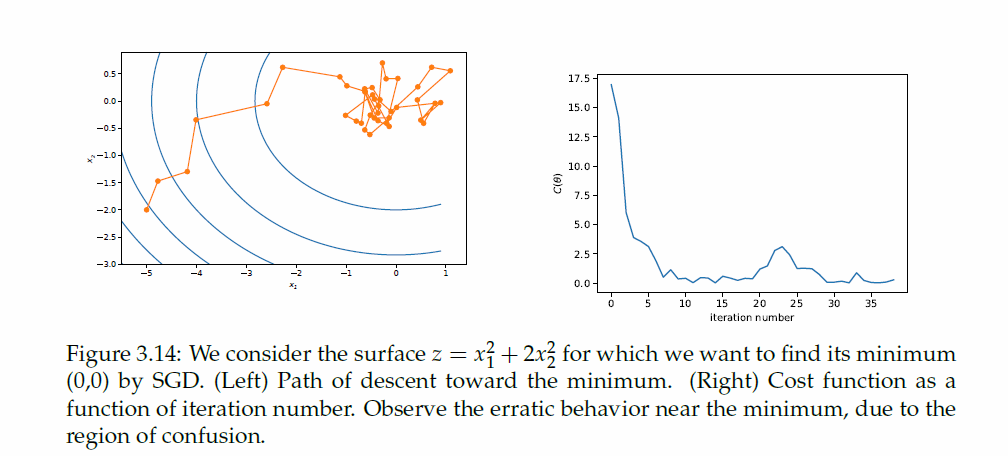

La explicacion de la Figura 3.14 la hice oralmente.
Surgen las siguientes preguntas:

1. Que pasa cuanto estamos en la zona de confusion?
2. Podemos estimar la incertidumbre en este metodo?
3. Que se puede hacer cuando la varianza es muy grande y se pierde la fe.
4. Como podemos estimar el parametro de aprendizaje $\alpha$?

* Pregunta #1: Mientras estemos en la zona de confusion, no hay forma de saber si nos estamos moviendo en la direccion correcta. Hay dos puntos importantes:

    * Existe algo que se llama **early stopping** (parada temprana). Podemos parar las iteraciones, por ejemplo en la Figura 3.14, en la iteracion 15 y llegar a un resultada aceptable.
    * Por que puede ser aceptable este resultado? Por que en ML no se necesita que los minimos sean exactos. Al contrario esto produce "**overfitting** y no es deseable. Entonces esta bien que los minimos sean aproximados.

* Pregunta # 2: Hay dos estadisticas importantes:
    * La media (esperanza).
$$\mathbb{E}[\nabla C_i(\theta)] = \frac1m \sum_{i=1}^m \nabla C_i(\theta) = \nabla J(\theta) $$
    Si la densidad de probabilidad no es uniforme entonces (digamos que es $\mu$)
$$\mathbb{E}[\nabla C_i(\theta)] = \sum_{i=1}^m \mu_i \nabla C_i(\theta) = \nabla J(\theta) $$
    * La varianza:
$$ \mathbb{V}[ \nabla C_i(\theta)] = \frac{1}{m-1} \sum_{i=1}^m \| \nabla C_i(\theta) - \nabla J(\theta) \|^2 $$

* La pregunta 3 se resuelve con el metodo del **minibatch** donde, en vez de tomar una muestra se toman $k$ muestras $1 < k < m$. Si $k=m$ es el **batch**.
Esto tambien suaviza la trajectoria.

* La pregunta 4 ya la hemos distutido (Armijo, backtrack, prueba y error, casos analiticos: CG, SD, etc). Los otros casos (AdaGrad, Adam, RMSprop,etc) en el curso de DL.

Volviendo a la pregunta 3. En el minibatch se escogen algunas muestras, y tambien aleatorias.  Veamos el algoritmo de Minibatch Gradient Descent.
    

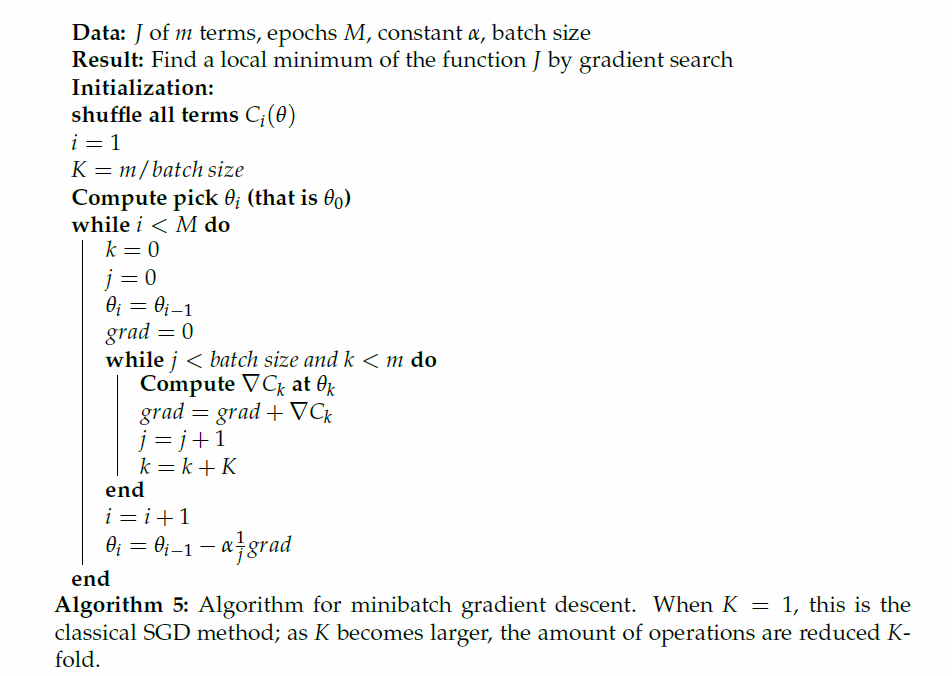

# Proxima clase:
    * Regresion lineal multiple (mas de un "feature")
    * Regresion logistica.